GBM Simulator 

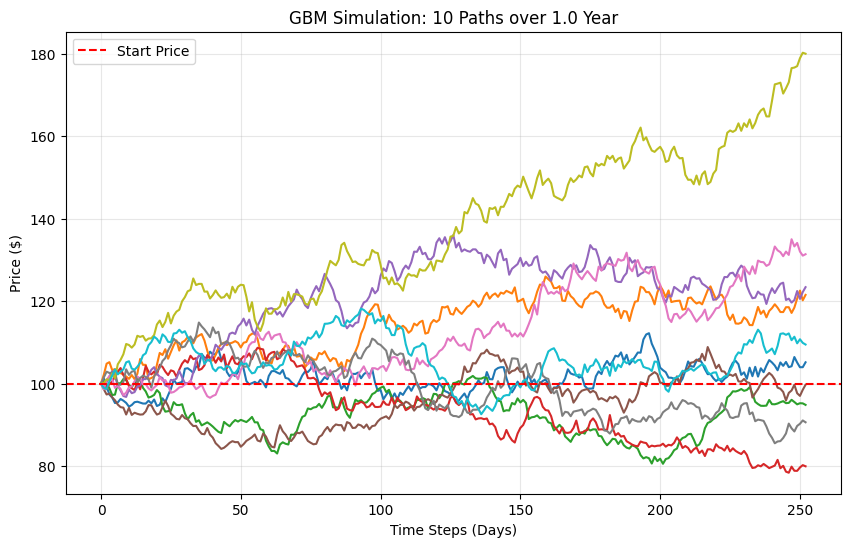

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_gbm(S0, mu, sigma, T, steps, n_simulations):
    
    # 1. Calculate Delta t (dt)
    dt = T / steps
    
    # 2. Generate Z_t (Random Shocks)
    # Shape: (steps, n_simulations)
    Z = np.random.normal(0, 1, (steps, n_simulations))
    
    drift_term = (mu - 0.5 * sigma**2) * dt
    diffusion_term = sigma * np.sqrt(dt) * Z
    
    daily_returns = np.exp(drift_term + diffusion_term)
    
    # Price Paths
    # To get S_t from S_0, we multiply the cumulative returns
    # We create a placeholder array for prices
    price_paths = np.zeros((steps + 1, n_simulations))
    
    # Set the first row to the initial price S0
    price_paths[0] = S0
    
    # Calculate the rest using cumulative product
    price_paths[1:] = S0 * np.cumprod(daily_returns, axis=0)
    
    return price_paths

S0 = 100       # Initial price ($100)
mu = 0.10      # Drift (10% expected return)
sigma = 0.20   # Volatility (20%)
T = 1.0        # Time horizon (1 year)
steps = 252    # Trading days in a year
sims = 10     # Number of simulations (paths) to run

#Simulation 
paths = simulate_gbm(S0, mu, sigma, T, steps, sims)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(paths)
plt.title(f'GBM Simulation: {sims} Paths over {T} Year')
plt.xlabel('Time Steps (Days)')
plt.ylabel('Price ($)')
plt.grid(True, alpha=0.3)

plt.axhline(y=S0, color='r', linestyle='--', label='Start Price')
plt.legend()
plt.show()

Expected Price: 113.60


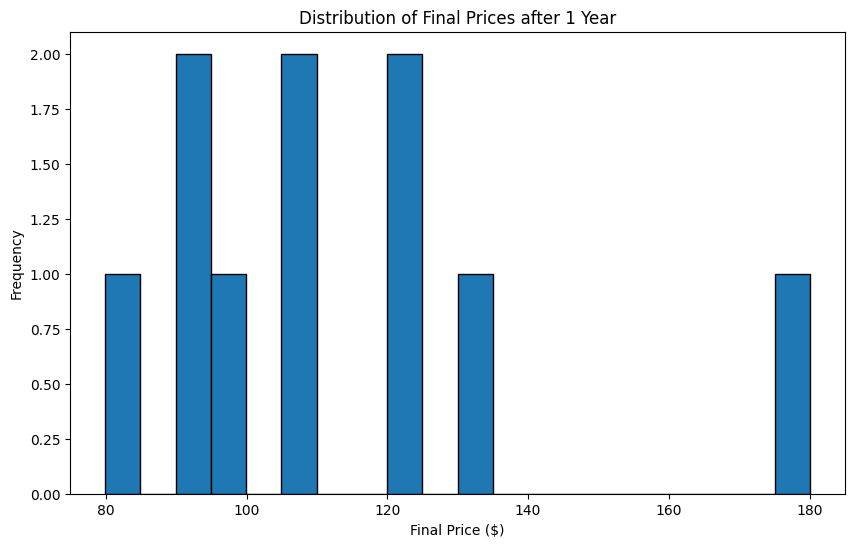

In [14]:
final_prices = paths[-1]
plt.figure(figsize=(10, 6))
plt.hist(final_prices, bins=20, edgecolor='black')
plt.title('Distribution of Final Prices after 1 Year')
plt.xlabel('Final Price ($)')
plt.ylabel('Frequency')
print(f"Expected Price: {np.mean(final_prices):.2f}")